# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from scipy import linalg
from types import SimpleNamespace
import pandas as pd 
import matplotlib.pyplot as plt
import ipywidgets 
from IPython.display import display


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

#We import our the classes that is needed
from modelproject import Solow
model1 = Solow()
from modelproject import Solow_H
model2 = Solow_H()

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

**The equations for The Basic Solow Model**
$$Y_t=K^\alpha_t(A_tL_t)^{1-\alpha}, \quad 0<\alpha<1 \tag{1}$$
$$K_{t+1}=sY_t+(1-\delta)K_t, \quad 0<\delta<1 \tag{2}$$
$$S_t=sY_t, \quad 0<s<1 \tag{3}$$
$$L_{t+1}=(1+n)L_t \tag{4}$$
$$A_{t+1}=(1+g)A_t \tag{5}$$

We compute the transition equation

$$
\tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[s\tilde{k}_{t}^\alpha+(1-\delta)\tilde{k}_{t}]
$$

In [2]:
# We define the parameters used in the model
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

In [3]:
model1.ss_equation()

((delta + g*n + g + n)/s)**(1/(alpha - 1))

This can be rewritten as:

$$
\tilde{k}^*= \frac{s}{\delta+gn+g+n}^\frac{1}{1-\alpha}
$$

We give the parameters the following values:
$$
\alpha = 0.3
$$
$$
\delta = 0.05
$$
$$
s = 0.2
$$
$$
g = 0.2
$$
$$
n = 0.02
$$

In [4]:
model1.ss_value()

0.6378005715094126

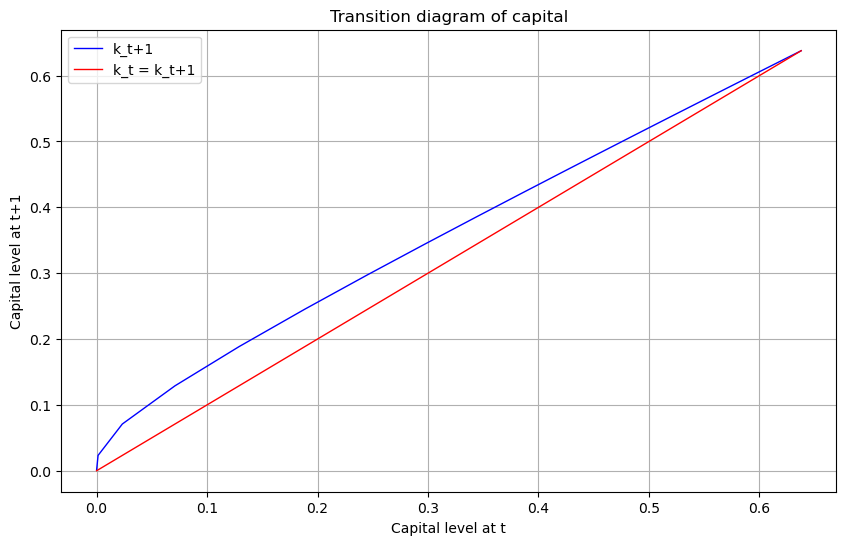

In [5]:
model1.transition_diagram()

In [6]:
model1.interactive_plot()

interactive(children=(FloatSlider(value=0.2, description='s', max=0.5, step=0.01), Output()), _dom_classes=('w…

In [7]:
# Out parameters (are also in our .py file)
k = sm.symbols('k')
h = sm.symbols('h')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s_K = sm.symbols('s_K')
s_H = sm.symbols('s_H')
g = sm.symbols('g')
n = sm.symbols('n')
phi = sm.symbols('phi')

In [8]:
model2.ss_value_k(k,h,alpha,delta,s_K,s_H,g,n,phi)

((delta + g*n + g + n)/(s_K*(((delta + g*n + g + n)/(k**alpha*s_H))**(1/(phi - 1)))**phi))**(1/(alpha - 1))

In [9]:
model2.ss_value_h(k,h,alpha,delta,s_K,s_H,g,n,phi)

((delta + g*n + g + n)/(s_H*(((delta + g*n + g + n)/(h**phi*s_K))**(1/(alpha - 1)))**alpha))**(1/(phi - 1))

In [10]:
# We have the 2 ss as:
k_tilde = ((s_K**(1-phi) * s_H**phi)/(n+g+delta +n*g))**(1/(1-phi-alpha))
h_tilde = ( (s_K**(alpha) * s_H**(1-alpha))/(n+g+delta +n*g))**(1/(1-phi-alpha))
        
# Turning into python function and use lambdify
kss_function = sm.lambdify((alpha,phi,delta,n,g,s_K,s_H),k_tilde)
hss_function = sm.lambdify((alpha,phi,delta,n,g,s_K,s_H),h_tilde) 

print(f'SS value for k:  {kss_function(0.3,0.3,0.05,0.02,0.01,0.2,0.15):4f}, and ss value for h: {hss_function(0.3,0.3,0.05,0.02,0.01,0.2,0.15):4f}')


SS value for k:  7.914710, and ss value for h: 5.936033


In [12]:
model2.Nullclines()

interactive(children=(FloatSlider(value=0.2, description='s_K', max=1.0, min=0.01, step=0.01), FloatSlider(val…

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 